## Notebook Setup
### Set up DB connection

In [47]:
%run '00_database_connectivity_setup.ipynb'

,x,y
0,0.608754,0.279617
1,0.866944,0.708063
2,0.520928,0.368465
3,0.493418,0.879985
4,0.989349,0.359151


In [48]:
%%execsql
set search_path to yelp;

### Import necessary modules

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image


%matplotlib inline

# Limit rows disp# Limit rows displayed in notebook
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 300)
pd.set_option('display.precision', 6)

plt.style.use('tableau10')

def set_labels(ax,title, x,y):
    ax.set_title(title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    return ax

def change_legend_text(labels):
    legend = plt.legend()
    legend_texts = legend.get_texts()
    for i in range(0,len(labels)):
        legend_texts[i].set_text(labels[i])

## Data Review

### Narrow scope of data to restaurants and bars in the U.S and Canada 

In [6]:
%%showsql
select * from businesses limit 5;

,business_id,city,full_address,latitude,longitude,name,categories,open,review_count,stars,neighborhoods,state,key_hours.friday.close,key_hours.friday.open,key_hours.monday.close,key_hours.monday.open,key_hours.saturday.close,key_hours.saturday.open,key_hours.sunday.close,key_hours.sunday.open,key_hours.thursday.close,key_hours.thursday.open,key_hours.tuesday.close,key_hours.tuesday.open,key_hours.wednesday.close,key_hours.wednesday.open,payment_types.visa,hair_types_specialized_in.kids,dietary_restrictions.dairy-free,hair_types_specialized_in.perms,dietary_restrictions.kosher,hair_types_specialized_in.straightperms,music.karaoke,payment_types.discover,order_at_counter,dietary_restrictions.halal,dietary_restrictions.gluten-free,payment_types.amex,happy_hour,hair_types_specialized_in.extensions,corkage,dietary_restrictions.vegetarian,hair_types_specialized_in.curly,accepts_insurance,music.playlist,good_for_dancing,byob,hair_types_specialized_in.asian,music.video,payment_types.cash_only,hair_types_specialized_in.africanamerican,by_appointment_only,caters,ambience.intimate,ambience.upscale,ambience.divey,waiter_service,open_24_hours,ambience.trendy,payment_types.mastercard,good_for.breakfast,ambience.classy,ambience.romantic,ambience.touristy,good_for.lunch,outdoor_seating,wheelchair_accessible,music.jukebox,music.background_music,has_tv,take-out,drive-thru,good_for_groups,dietary_restrictions.soy-free,takes_reservations,delivery,coat_check,parking.valet,parking.lot,dietary_restrictions.vegan,good_for.brunch,good_for.dinner,hair_types_specialized_in.coloring,music.dj,good_for.dessert,good_for.latenight,parking.garage,dogs_allowed,parking.validated,music.live,parking.street,good_for_kids,ambience.hipster,accepts_credit_cards,ambience.casual,byob/corkage,smoking,wi-fi,ages_allowed,alcohol,noise_level,price_range,attire
0,-h1WpfgqAmJcJDqyXXJ2og,Mesa,"6455 East Southern Ave.\nMesa, AZ 85206",33.39,-111.69,Fuddruckers,"[Burgers, American (Traditional), Restaurants]",1,35,4.0,None,AZ,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,1.0,0.0,0.0,0.0,0.0,None,0.0,None,0.0,0.0,0.0,0.0,1.0,0.0,None,None,None,1.0,1.0,0.0,1.0,None,0.0,0.0,None,0.0,1.0,None,0.0,0.0,None,None,0.0,0.0,0.0,None,0.0,None,0.0,1,0.0,1.0,1.0,None,None,free,None,beer_and_wine,average,2,casual
1,Rzt4dYbqisWI1mVyQyNzZw,Mesa,"4827 E Southern Ave #100\nSte 100\nMesa, AZ 85206",33.39,-111.73,Whiting Dental,"[Oral Surgeons, Health & Medical, Dentists, General Dentistry, Cosmetic Dentists]",1,3,5.0,None,AZ,12:00,08:00,17:00,07:00,None,None,None,None,17:00,07:00,16:00,07:00,17:00,07:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1.0,NaN,NaN,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,NaN,None,NaN,None,NaN,2,NaN,NaN,NaN,None,None,None,None,None,None,None,None
2,5t_is8G1Ti5jNk6cH7dGSg,Mesa,"2864 N Power Rd\nMesa, AZ 85215",33.47,-111.68,Bashas',"[Food, Grocery]",1,3,3.5,None,AZ,23:00,06:00,23:00,06:00,23:00,06:00,23:00,06:00,23:00,06:00,23:00,06:00,23:00,06:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,None,NaN,NaN,None,0.0,1.0,None,NaN,NaN,None,None,NaN,NaN,0.0,None,0.0,None,0.0,2,NaN,1.0,NaN,None,None,None,None,None,None,1,None
3,d0xcFzZWANt_ywSamv96WQ,Matthews,"10101 E Independence Blvd\nMatthews, NC 28105",35.13,-80.71,Office Depot,"[Local Services, Computers, Shopping, Printing Services, Office Equipment]",1,5,3.0,None,NC,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None

__What categories do we need to use to filter data down to restaurants and bars?__

In [36]:
%%showsql
select * from count_summary('category', 'yelp.business_categories');

,col,cnt,prob,cume_prob
0,Restaurants,21892,0.122719,0.122719
1,Shopping,8919,0.049997,0.172716
2,Food,7862,0.044072,0.216788
3,Beauty & Spas,4738,0.026560,0.243347
4,Nightlife,4340,0.024329,0.267676
5,Bars,3628,0.020337,0.288013
6,Health & Medical,3213,0.018011,0.306024
7,Automotive,2965,0.016621,0.322645
8,Home Services,2853,0.015993,0.338638
9,Fashion,2566,0.014384,0.353022


In [43]:
%%execsql
drop table if exists restaurants_us_ca;
create table restaurants_us_ca as
select 
    *
    ,case when state='AZ' then 'Phoenix'
    when state='PA' then 'Pittsburgh'
    when state='IL' then 'Urbana-Champaign'
    when state='NV' then 'Las Vegas'
    when state='WI' then 'Madison'
    when state='NC' then 'Charlotte'
    when state='ON' then 'Waterloo'
    when state='QC' then 'Montreal'
    else null end as city_1
from 
    businesses
join (
    select 
        business_id 
    from 
        business_categories 
    where 
        category ilike ANY(array['restaurants', 'food']) 
    group by 1
) cats
using (business_id)
where 
    state ilike ANY(array['AZ','PA','IL','NV','WI', 'NC', 'ON','QC'])
distributed by (business_id);

In [35]:
%%showsql
select count(*) from restaurants_us_ca;

,count
0,25735


In [33]:
%%showsql
select count(*) from businesses

,count
0,61184


In [38]:
%%showsql
select * from restaurants_us_ca limit 5;

,business_id,city,full_address,latitude,longitude,name,categories,open,review_count,stars,neighborhoods,state,key_hours.friday.close,key_hours.friday.open,key_hours.monday.close,key_hours.monday.open,key_hours.saturday.close,key_hours.saturday.open,key_hours.sunday.close,key_hours.sunday.open,key_hours.thursday.close,key_hours.thursday.open,key_hours.tuesday.close,key_hours.tuesday.open,key_hours.wednesday.close,key_hours.wednesday.open,payment_types.visa,hair_types_specialized_in.kids,dietary_restrictions.dairy-free,hair_types_specialized_in.perms,dietary_restrictions.kosher,hair_types_specialized_in.straightperms,music.karaoke,payment_types.discover,order_at_counter,dietary_restrictions.halal,dietary_restrictions.gluten-free,payment_types.amex,happy_hour,hair_types_specialized_in.extensions,corkage,dietary_restrictions.vegetarian,hair_types_specialized_in.curly,accepts_insurance,music.playlist,good_for_dancing,byob,hair_types_specialized_in.asian,music.video,payment_types.cash_only,...,ambience.upscale,ambience.divey,waiter_service,open_24_hours,ambience.trendy,payment_types.mastercard,good_for.breakfast,ambience.classy,ambience.romantic,ambience.touristy,good_for.lunch,outdoor_seating,wheelchair_accessible,music.jukebox,music.background_music,has_tv,take-out,drive-thru,good_for_groups,dietary_restrictions.soy-free,takes_reservations,delivery,coat_check,parking.valet,parking.lot,dietary_restrictions.vegan,good_for.brunch,good_for.dinner,hair_types_specialized_in.coloring,music.dj,good_for.dessert,good_for.latenight,parking.garage,dogs_allowed,parking.validated,music.live,parking.street,good_for_kids,ambience.hipster,accepts_credit_cards,ambience.casual,byob/corkage,smoking,wi-fi,ages_allowed,alcohol,noise_level,price_range,attire,city_1
0,FdBoYwB90oxGrxmSh0Ko7g,Charlotte,"4832 Central Ave\nSte D\nEastland\nCharlotte, NC 28205",35.211508,-80.761671,Cedar Land,"[Food, Ethnic Food, Specialty Food, Greek, Middle Eastern, Restaurants]",1,17,3.5,[Eastland],NC,22:00,09:30,22:00,09:30,22:00,09:30,22:00,09:30,22:00,09:30,22:00,09:30,22:00,09:30,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,0.0,0.0,1.0,None,0.0,None,0.0,0.0,0.0,0.0,1.0,0.0,1.0,None,None,1.0,1.0,NaN,1.0,None,1.0,0.0,None,0,1,None,0.0,0.0,None,None,0.0,0.0,0,0.0,0,None,0,1,0.0,1,0.0,None,None,no,None,none,quiet,1,casual,Charlotte
1,Nh9BjVPHdrZMn2naUxO6hg,Goodyear,"1560 N Litchfield Rd\nGoodyear, AZ 85395",33.463811,-112.358687,Chipotle Mexican Grill,"[Fast Food, Mexican, Restaurants]",1,43,2.5,None,AZ,22:00,11:00,22:00,11:00,22:00,11:00,22:00,11:00,22:00,11:00,22:00,11:00,22:00,11:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,0.0,0.0,0.0,None,0.0,None,0.0,0.0,0.0,0.0,1.0,1.0,1.0,None,None,0.0,1.0,0.0,1.0,None,0.0,0.0,None,0,1,None,0.0,0.0,None,None,0.0,0.0,0,NaN,0,None,0,1,0.0,1,1.0,None,None,no,None,beer_and_wine,average,1,casual,Phoenix
2,JLAv7wuaVp9VSo2n_kHOlQ,Phoenix,"4105 N 51st Ave\nPhoenix, AZ 85031",33.495480,-112.168816,Tokyo Express,"[Japanese, Restaurants]",1,9,3.5,None,AZ,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,0.0,0.0,NaN,None,0.0,None,NaN,0.0,0.0,0.0,NaN,0.0,NaN,None,None,NaN,1.0,NaN,1.0,None,0.0,0.0,None,0,0,None,NaN,NaN,None,None,NaN,NaN,0,NaN,0,None,0,1,0.0,1,0.0,None,None,no,None,None,average,1,casual,Phoenix
3,GAA2AxjySMqN-p-n89SJIA,Las Vegas,"3645 Las Vegas Blvd S\nThe Strip\nLas Vegas, NV 89109",36.113534,-115.168408,Ichiban Sushi,"[Sushi Bars, Japanese, Restaurants]",0,108,3.5,[The Strip],NV,23:30,07:00,23:00,07:00,23:30,07:00,23:00,07:00,23:00,07:00,23:00,07:00,23:00,07:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,0.0,0.0,1.0,None,0.0,None,0.0,0.0,0.0,0.0,1.0,

### Businesses

Some questions:
- city
    + how many total businesses are there in each city? 
    + what is the avg review count in each city?
    + what is the distribution of # of reviews in each city?
    + how many open/closed businesses per city? 
    + what is the distribution of ratings across each city?
    + how many different categories are there in each city?
    + how many cities per state?
- full_address
    + does the city in full_address match the city column?
- name
    + what are the most common businesses? per city?
- categories
    + what is the distribution of number of categories a businesses belongs to? 
    + what are the top categories?
    + what's the distribution of ratings for the top 10 categories?
    + what is the avg rating for each category?
    + how do we filter out restaurants?
- open
    + what is the distribution of stars for open/closed businesses? 
    + what is the distribution of review_count for open/closed businesses? 
    + what is the avg review_count for open/closed businesses in each city?
- neighborhoods
    + how many neighborhoods do businesses belong to?
    + how many neighborhoods are in each city?

In [44]:
%%showsql
select * from restaurants_us_ca limit 5;

,business_id,city,full_address,latitude,longitude,name,categories,open,review_count,stars,neighborhoods,state,key_hours.friday.close,key_hours.friday.open,key_hours.monday.close,key_hours.monday.open,key_hours.saturday.close,key_hours.saturday.open,key_hours.sunday.close,key_hours.sunday.open,key_hours.thursday.close,key_hours.thursday.open,key_hours.tuesday.close,key_hours.tuesday.open,key_hours.wednesday.close,key_hours.wednesday.open,payment_types.visa,hair_types_specialized_in.kids,dietary_restrictions.dairy-free,hair_types_specialized_in.perms,dietary_restrictions.kosher,hair_types_specialized_in.straightperms,music.karaoke,payment_types.discover,order_at_counter,dietary_restrictions.halal,dietary_restrictions.gluten-free,payment_types.amex,happy_hour,hair_types_specialized_in.extensions,corkage,dietary_restrictions.vegetarian,hair_types_specialized_in.curly,accepts_insurance,music.playlist,good_for_dancing,byob,hair_types_specialized_in.asian,music.video,payment_types.cash_only,...,ambience.upscale,ambience.divey,waiter_service,open_24_hours,ambience.trendy,payment_types.mastercard,good_for.breakfast,ambience.classy,ambience.romantic,ambience.touristy,good_for.lunch,outdoor_seating,wheelchair_accessible,music.jukebox,music.background_music,has_tv,take-out,drive-thru,good_for_groups,dietary_restrictions.soy-free,takes_reservations,delivery,coat_check,parking.valet,parking.lot,dietary_restrictions.vegan,good_for.brunch,good_for.dinner,hair_types_specialized_in.coloring,music.dj,good_for.dessert,good_for.latenight,parking.garage,dogs_allowed,parking.validated,music.live,parking.street,good_for_kids,ambience.hipster,accepts_credit_cards,ambience.casual,byob/corkage,smoking,wi-fi,ages_allowed,alcohol,noise_level,price_range,attire,city_1
0,3ornwb5L2Cy-DKeR6xbpdw,Charlotte,"3607 Whitehall Park Dr\nSte X\nSteele Creek\nCharlotte, NC 28273",35.151786,-80.950810,Siam Garden,"[Thai, Restaurants]",1,57,3.5,[Steele Creek],NC,23:00,11:00,22:00,11:00,23:00,11:00,22:00,11:00,22:00,11:00,22:00,11:00,22:00,11:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,0,0,1,None,0,None,0,0,0,0,1,0,1.0,None,None,1,1,None,1,None,1,0,None,0,1,None,0,0,None,None,0,0,0,None,0,None,0,1,0,1,1,None,None,no,None,beer_and_wine,average,2,casual,Charlotte
1,Nf2Vj8R6So6_jeX-YhAdJA,Henderson,"4350 E Sunset Road\nHenderson, NV 89014",36.071441,-115.078507,Coyote's Cafe & Cantina,"[Mexican, Restaurants]",1,84,3.5,None,NV,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,0,0,1,None,0,None,0,0,0,0,1,0,1.0,None,None,1,1,None,1,None,1,0,None,0,1,None,0,1,None,None,0,0,0,None,0,None,0,1,0,1,1,no,None,no,None,full_bar,average,2,casual,Las Vegas
2,0RIAwEggED60mK3mDSTr-Q,Charlotte,"8511 Davis Lake Pkwy\nCharlotte, NC 28269",35.334619,-80.812216,Davinci's Pizza,"[Pizza, Restaurants]",1,45,4.0,None,NC,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,0,0,0,None,0,None,0,0,0,0,1,1,NaN,None,None,1,1,None,1,None,0,1,None,0,1,None,0,1,None,None,0,0,0,None,0,None,0,1,0,1,1,None,None,no,None,none,average,2,casual,Charlotte
3,_W5QrZQPfqjj6njeqrGYEA,Matthews,"10450 E. Independence Blvd.\nMatthews, NC 28105",35.125895,-80.706219,Texas Roadhouse,"[American (Traditional), Steakhouses, Barbeque, Restaurants]",1,41,3.0,None,NC,23:00,11:00,22:00,16:00,23:00,11:00,22:00,11:00,22:00,16:00,22:00,16:00,22:00,16:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,0,0,1,None,0,None,0,0,0,0,0,0,0.0,None,None,1,1,None,1,None,0,0,None,0,1,None,0,1,None,None,1,0,0,None,0,None,0,1,0,1,1,None,None,None,None,full_bar,loud,2,casual,Charlotte
4,jZ6ICfZ9GBg0GTOAmoGJ4g,No

In [45]:
%%execsql
select madlib.summary('yelp.restaurants_us_ca','yelp.restaurants_us_ca_summ');

In [52]:
%%showsql
select target_column,data_type,row_count,distinct_values,missing_values,blank_values,fraction_missing,fraction_blank, mean, variance, "min", "max", first_quartile, median, third_quartile, most_frequent_values, mfv_frequencies 
from yelp.restaurants_us_ca_summ
order by fraction_missing desc, fraction_blank desc;

,target_column,data_type,row_count,distinct_values,missing_values,blank_values,fraction_missing,fraction_blank,mean,variance,min,max,first_quartile,median,third_quartile,most_frequent_values,mfv_frequencies
0,"""hair_types_specialized_in.perms""",int4,25735,0,25735,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1,"""hair_types_specialized_in.africanamerican""",int4,25735,0,25735,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2,"""hair_types_specialized_in.straightperms""",int4,25735,0,25735,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
3,"""hair_types_specialized_in.extensions""",int4,25735,0,25735,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
4,"""hair_types_specialized_in.curly""",int4,25735,0,25735,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
5,"""hair_types_specialized_in.coloring""",int4,25735,0,25735,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
6,"""hair_types_specialized_in.asian""",int4,25735,0,25735,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
7,"""hair_types_specialized_in.kids""",int4,25735,0,25735,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
8,"""music.playlist""",int4,25735,2,25733,NaN,0.999922,NaN,0.500000,0.500000,0.000000,1.000000,0.250000,0.500000,0.750000,"[0, 1]","[1, 1]"
9,accepts_insurance,int4,25735,1,25730,NaN,0.999806,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"[0, 0, 0, 0, 0]","[5, 5, 5, 5, 5]"


#### attributes

In [41]:
sql = """select column_name::text from information_schema.columns where table_name='restaurants_us_ca' and table_schema='yelp' and ordinal_position >= 27 and ordinal_position<104 order by ordinal_position"""

df = psql.read_sql(sql,conn)
conn.commit()
columns = df.column_name.tolist()[1:]
table_name = 'yelp.restaurants_us_ca'
fails = []

for col in columns:
    try:
        sql="""select * from count_summary('{col}', '{table_name}');""".format(table_name=table_name, col=col)
        df = psql.read_sql(sql,conn)
        conn.commit()
        display(col)
        display(df)
    except:
        fails.append(col)
        pass

'hair_types_specialized_in.kids'

,col,cnt,prob,cume_prob
0,None,25735,1.0,1.0


'dietary_restrictions.dairy-free'

,col,cnt,prob,cume_prob
0,None,25677,0.997746,0.997746
1,0,41,0.001593,0.999339
2,1,17,0.000661,1.000000


'hair_types_specialized_in.perms'

,col,cnt,prob,cume_prob
0,None,25735,1.0,1.0


'dietary_restrictions.kosher'

,col,cnt,prob,cume_prob
0,None,25677,0.997746,0.997746
1,0,54,0.002098,0.999845
2,1,4,0.000155,1.000000


'hair_types_specialized_in.straightperms'

,col,cnt,prob,cume_prob
0,None,25735,1.0,1.0


'music.karaoke'

,col,cnt,prob,cume_prob
0,None,25024,0.972372,0.972372
1,0,666,0.025879,0.998251
2,1,45,0.001749,1.000000


'payment_types.discover'

,col,cnt,prob,cume_prob
0,None,25723,0.999534,0.999534
1,0,9,0.000350,0.999883
2,1,3,0.000117,1.000000


'order_at_counter'

,col,cnt,prob,cume_prob
0,None,25353,0.985156,0.985156
1,1,239,0.009287,0.994443
2,0,143,0.005557,1.000000


'dietary_restrictions.halal'

,col,cnt,prob,cume_prob
0,None,25677,0.997746,0.997746
1,0,53,0.002059,0.999806
2,1,5,0.000194,1.000000


'dietary_restrictions.gluten-free'

,col,cnt,prob,cume_prob
0,None,25677,0.997746,0.997746
1,0,49,0.001904,0.999650
2,1,9,0.000350,1.000000


'payment_types.amex'

,col,cnt,prob,cume_prob
0,None,25723,0.999534,0.999534
1,0,9,0.000350,0.999883
2,1,3,0.000117,1.000000


'happy_hour'

,col,cnt,prob,cume_prob
0,None,23896,0.928541,0.928541
1,1,1564,0.060773,0.989314
2,0,275,0.010686,1.000000


'hair_types_specialized_in.extensions'

,col,cnt,prob,cume_prob
0,None,25735,1.0,1.0


'corkage'

,col,cnt,prob,cume_prob
0,None,25087,0.974820,0.974820
1,0,512,0.019895,0.994715
2,1,136,0.005285,1.000000


'dietary_restrictions.vegetarian'

,col,cnt,prob,cume_prob
0,None,25677,0.997746,0.997746
1,1,51,0.001982,0.999728
2,0,7,0.000272,1.000000


'hair_types_specialized_in.curly'

,col,cnt,prob,cume_prob
0,None,25735,1.0,1.0


'accepts_insurance'

,col,cnt,prob,cume_prob
0,None,25730,0.999806,0.999806
1,0,5,0.000194,1.000000


'music.playlist'

,col,cnt,prob,cume_prob
0,None,25733,0.999922,0.999922
1,1,1,0.000039,0.999961
2,0,1,0.000039,1.000000


'good_for_dancing'

,col,cnt,prob,cume_prob
0,None,23983,0.931922,0.931922
1,0,1483,0.057626,0.989547
2,1,269,0.010453,1.000000


'byob'

,col,cnt,prob,cume_prob
0,None,24881,0.966816,0.966816
1,0,810,0.031475,0.998290
2,1,44,0.001710,1.000000


'hair_types_specialized_in.asian'

,col,cnt,prob,cume_prob
0,None,25735,1.0,1.0


'music.video'

,col,cnt,prob,cume_prob
0,None,24688,0.959316,0.959316
1,0,991,0.038508,0.997824
2,1,56,0.002176,1.000000


'payment_types.cash_only'

,col,cnt,prob,cume_prob
0,None,25723,0.999534,0.999534
1,0,10,0.000389,0.999922
2,1,2,0.000078,1.000000


'hair_types_specialized_in.africanamerican'

,col,cnt,prob,cume_prob
0,None,25735,1.0,1.0


'by_appointment_only'

,col,cnt,prob,cume_prob
0,None,25496,0.990713,0.990713
1,0,228,0.008860,0.999573
2,1,11,0.000427,1.000000


'caters'

,col,cnt,prob,cume_prob
0,None,13179,0.512104,0.512104
1,0,6543,0.254245,0.766349
2,1,6013,0.233651,1.000000


'ambience.intimate'

,col,cnt,prob,cume_prob
0,0,15822,0.614805,0.614805
1,None,9736,0.378317,0.993122
2,1,177,0.006878,1.000000


'ambience.upscale'

,col,cnt,prob,cume_prob
0,0,15743,0.611735,0.611735
1,None,9845,0.382553,0.994288
2,1,147,0.005712,1.000000


'ambience.divey'

,col,cnt,prob,cume_prob
0,0,14774,0.574082,0.574082
1,None,10326,0.401243,0.975325
2,1,635,0.024675,1.000000


'waiter_service'

,col,cnt,prob,cume_prob
0,1,10919,0.424286,0.424286
1,None,8102,0.314824,0.739110
2,0,6714,0.260890,1.000000


'open_24_hours'

,col,cnt,prob,cume_prob
0,None,25474,0.989858,0.989858
1,0,237,0.009209,0.999067
2,1,24,0.000933,1.000000


'ambience.trendy'

,col,cnt,prob,cume_prob
0,0,15442,0.600039,0.600039
1,None,9736,0.378317,0.978356
2,1,557,0.021644,1.000000


'payment_types.mastercard'

,col,cnt,prob,cume_prob
0,None,25723,0.999534,0.999534
1,1,9,0.000350,0.999883
2,0,3,0.000117,1.000000


'good_for.breakfast'

,col,cnt,prob,cume_prob
0,0,16415,0.637847,0.637847
1,None,7835,0.304449,0.942296
2,1,1485,0.057704,1.000000


'ambience.classy'

,col,cnt,prob,cume_prob
0,0,15619,0.606917,0.606917
1,None,9736,0.378317,0.985234
2,1,380,0.014766,1.000000


'ambience.romantic'

,col,cnt,prob,cume_prob
0,0,15773,0.612901,0.612901
1,None,9736,0.378317,0.991218
2,1,226,0.008782,1.000000


'ambience.touristy'

,col,cnt,prob,cume_prob
0,0,15912,0.618302,0.618302
1,None,9736,0.378317,0.996619
2,1,87,0.003381,1.000000


'good_for.lunch'

,col,cnt,prob,cume_prob
0,0,10912,0.424014,0.424014
1,None,7845,0.304838,0.728852
2,1,6978,0.271148,1.000000


'outdoor_seating'

,col,cnt,prob,cume_prob
0,0,10887,0.423043,0.423043
1,1,8559,0.332582,0.755625
2,None,6289,0.244375,1.000000


'wheelchair_accessible'

,col,cnt,prob,cume_prob
0,None,13407,0.520964,0.520964
1,1,11394,0.442743,0.963707
2,0,934,0.036293,1.000000


'music.jukebox'

,col,cnt,prob,cume_prob
0,None,24615,0.956480,0.956480
1,0,824,0.032019,0.988498
2,1,296,0.011502,1.000000


'music.background_music'

,col,cnt,prob,cume_prob
0,None,25033,0.972722,0.972722
1,1,437,0.016981,0.989703
2,0,265,0.010297,1.000000


'has_tv'

,col,cnt,prob,cume_prob
0,None,9105,0.353798,0.353798
1,1,8444,0.328113,0.681912
2,0,8186,0.318088,1.000000


'take-out'

,col,cnt,prob,cume_prob
0,1,17275,0.671265,0.671265
1,None,6971,0.270876,0.942141
2,0,1489,0.057859,1.000000


'drive-thru'

,col,cnt,prob,cume_prob
0,None,23269,0.904177,0.904177
1,0,1288,0.050049,0.954226
2,1,1178,0.045774,1.000000


'good_for_groups'

,col,cnt,prob,cume_prob
0,1,16751,0.650903,0.650903
1,None,6754,0.262444,0.913348
2,0,2230,0.086652,1.000000


'dietary_restrictions.soy-free'

,col,cnt,prob,cume_prob
0,None,25677,0.997746,0.997746
1,0,52,0.002021,0.999767
2,1,6,0.000233,1.000000


'takes_reservations'

,col,cnt,prob,cume_prob
0,0,12182,0.473363,0.473363
1,None,7394,0.287313,0.760676
2,1,6159,0.239324,1.000000


'delivery'

,col,cnt,prob,cume_prob
0,0,14955,0.581115,0.581115
1,None,7298,0.283583,0.864698
2,1,3482,0.135302,1.000000


'coat_check'

,col,cnt,prob,cume_prob
0,None,23978,0.931727,0.931727
1,0,1653,0.064232,0.995959
2,1,104,0.004041,1.000000


'parking.valet'

,col,cnt,prob,cume_prob
0,0,22033,0.856149,0.856149
1,None,3045,0.118321,0.974471
2,1,657,0.025529,1.000000


'parking.lot'

,col,cnt,prob,cume_prob
0,0,11478,0.446007,0.446007
1,1,11210,0.435594,0.881601
2,None,3047,0.118399,1.000000


'dietary_restrictions.vegan'

,col,cnt,prob,cume_prob
0,None,25677,0.997746,0.997746
1,0,40,0.001554,0.999301
2,1,18,0.000699,1.000000


'good_for.brunch'

,col,cnt,prob,cume_prob
0,0,16927,0.657742,0.657742
1,None,7896,0.306820,0.964562
2,1,912,0.035438,1.000000


'good_for.dinner'

,col,cnt,prob,cume_prob
0,0,12595,0.489411,0.489411
1,None,7845,0.304838,0.794249
2,1,5295,0.205751,1.000000


'hair_types_specialized_in.coloring'

,col,cnt,prob,cume_prob
0,None,25735,1.0,1.0


'music.dj'

,col,cnt,prob,cume_prob
0,None,24244,0.942063,0.942063
1,0,1245,0.048378,0.990441
2,1,246,0.009559,1.000000


'good_for.dessert'

,col,cnt,prob,cume_prob
0,0,17522,0.680863,0.680863
1,None,7904,0.307130,0.987993
2,1,309,0.012007,1.000000


'good_for.latenight'

,col,cnt,prob,cume_prob
0,0,16973,0.659530,0.659530
1,None,7845,0.304838,0.964368
2,1,917,0.035632,1.000000


'parking.garage'

,col,cnt,prob,cume_prob
0,0,21185,0.823198,0.823198
1,None,3041,0.118166,0.941364
2,1,1509,0.058636,1.000000


'dogs_allowed'

,col,cnt,prob,cume_prob
0,None,23722,0.921780,0.921780
1,0,1563,0.060734,0.982514
2,1,450,0.017486,1.000000


'parking.validated'

,col,cnt,prob,cume_prob
0,0,22578,0.877327,0.877327
1,None,3047,0.118399,0.995726
2,1,110,0.004274,1.000000


'music.live'

,col,cnt,prob,cume_prob
0,None,24617,0.956557,0.956557
1,0,788,0.030620,0.987177
2,1,330,0.012823,1.000000


'parking.street'

,col,cnt,prob,cume_prob
0,0,19356,0.752127,0.752127
1,1,3332,0.129473,0.881601
2,None,3047,0.118399,1.000000


'good_for_kids'

,col,cnt,prob,cume_prob
0,1,15373,0.597358,0.597358
1,2,6674,0.259336,0.856693
2,0,3323,0.129124,0.985817
3,None,365,0.014183,1.000000


'ambience.hipster'

,col,cnt,prob,cume_prob
0,0,15602,0.606256,0.606256
1,None,9874,0.383680,0.989936
2,1,259,0.010064,1.000000


'accepts_credit_cards'

,col,cnt,prob,cume_prob
0,1,23718,0.921624,0.921624
1,None,1301,0.050554,0.972178
2,0,716,0.027822,1.000000


'ambience.casual'

,col,cnt,prob,cume_prob
0,None,9736,0.378317,0.378317
1,0,8243,0.320303,0.698621
2,1,7756,0.301379,1.000000


'byob/corkage'

,col,cnt,prob,cume_prob
0,None,24438,0.949602,0.949602
1,no,684,0.026579,0.976180
2,yes_free,469,0.018224,0.994405
3,yes_corkage,144,0.005595,1.000000


'smoking'

,col,cnt,prob,cume_prob
0,None,23999,0.932543,0.932543
1,outdoor,824,0.032019,0.964562
2,no,642,0.024947,0.989508
3,yes,270,0.010492,1.000000


'wi-fi'

,col,cnt,prob,cume_prob
0,None,10538,0.409481,0.409481
1,no,9303,0.361492,0.770973
2,free,5734,0.222809,0.993783
3,paid,160,0.006217,1.000000


'ages_allowed'

,col,cnt,prob,cume_prob
0,None,25709,0.998990,0.998990
1,21plus,12,0.000466,0.999456
2,allages,9,0.000350,0.999806
3,18plus,4,0.000155,0.999961
4,19plus,1,0.000039,1.000000


'alcohol'

,col,cnt,prob,cume_prob
0,None,8596,0.334020,0.334020
1,none,7978,0.310006,0.644026
2,full_bar,6666,0.259025,0.903050
3,beer_and_wine,2495,0.096950,1.000000


'noise_level'

,col,cnt,prob,cume_prob
0,average,10517,0.408665,0.408665
1,None,9732,0.378162,0.786827
2,quiet,3624,0.140820,0.927647
3,loud,1323,0.051409,0.979056
4,very_loud,539,0.020944,1.000000


'price_range'

,col,cnt,prob,cume_prob
0,2,11428,0.444065,0.444065
1,1,11224,0.436138,0.880202
2,None,1429,0.055527,0.935730
3,3,1357,0.052730,0.988459
4,4,297,0.011541,1.000000


'attire'

,col,cnt,prob,cume_prob
0,casual,18163,0.705770,0.705770
1,None,6864,0.266718,0.972489
2,dressy,657,0.025529,0.998018
3,formal,51,0.001982,1.000000


__irrelevant columns (remove for feature review)__
+ hair_types_specialized_in.kids
+ hair_types_specialized_in.perms
+ hair_types_specialized_in.straightperms
+ hair_types_specialized_in.extensions
+ hair_types_specialized_in.curly
+ hair_types_specialized_in.asian
+ hair_types_specialized_in.africanamerican
+ hair_types_specialized_in.coloring



In [56]:
%%execsql
--alter table restaurants_us_ca drop column "hair_types_specialized_in.kids", drop column "hair_types_specialized_in.perms"
alter table restaurants_us_ca drop column "hair_types_specialized_in.straightperms"
, drop column "hair_types_specialized_in.extensions"
,drop column "hair_types_specialized_in.curly", drop column "hair_types_specialized_in.asian", drop column "hair_types_specialized_in.africanamerican", drop column "hair_types_specialized_in.coloring"

__Which "restaurants" accept inssurance?__

In [57]:
%%showsql
select * from restaurants_us_ca where accepts_insurance is not null;

,business_id,city,full_address,latitude,longitude,name,categories,open,review_count,stars,neighborhoods,state,key_hours.friday.close,key_hours.friday.open,key_hours.monday.close,key_hours.monday.open,key_hours.saturday.close,key_hours.saturday.open,key_hours.sunday.close,key_hours.sunday.open,key_hours.thursday.close,key_hours.thursday.open,key_hours.tuesday.close,key_hours.tuesday.open,key_hours.wednesday.close,key_hours.wednesday.open,payment_types.visa,dietary_restrictions.dairy-free,dietary_restrictions.kosher,music.karaoke,payment_types.discover,order_at_counter,dietary_restrictions.halal,dietary_restrictions.gluten-free,payment_types.amex,happy_hour,corkage,dietary_restrictions.vegetarian,accepts_insurance,music.playlist,good_for_dancing,byob,music.video,payment_types.cash_only,by_appointment_only,caters,ambience.intimate,ambience.upscale,ambience.divey,waiter_service,open_24_hours,ambience.trendy,payment_types.mastercard,good_for.breakfast,ambience.classy,ambience.romantic,ambience.touristy,good_for.lunch,outdoor_seating,wheelchair_accessible,music.jukebox,music.background_music,has_tv,take-out,drive-thru,good_for_groups,dietary_restrictions.soy-free,takes_reservations,delivery,coat_check,parking.valet,parking.lot,dietary_restrictions.vegan,good_for.brunch,good_for.dinner,music.dj,good_for.dessert,good_for.latenight,parking.garage,dogs_allowed,parking.validated,music.live,parking.street,good_for_kids,ambience.hipster,accepts_credit_cards,ambience.casual,byob/corkage,smoking,wi-fi,ages_allowed,alcohol,noise_level,price_range,attire,city_1
0,bSFuJDDTj6BeKypgBNFBGg,Mesa,"48 N Robson\nMesa, AZ 85201",33.416546,-111.836832,Inside The Bungalow Caf\u00e9,"[Food, Coffee & Tea]",1,80,4.0,None,AZ,15:00,06:30,15:00,06:30,12:00,08:00,13:00,08:00,15:00,06:30,15:00,06:30,15:00,06:30,None,None,None,None,None,None,None,None,None,None,None,None,0,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,1.0,1.0,None,None,NaN,NaN,None,1.0,None,0.0,NaN,None,0,0,None,NaN,NaN,None,NaN,NaN,0,None,0,None,1,1,NaN,1,NaN,None,None,free,None,None,None,1,casual,Phoenix
1,rCQxZF_gnc9uKY0sG1qkow,Charlotte,"7510 Pineville-Matthews Rd\nSte 5-B\nCharlotte, NC 28226",35.087814,-80.845408,Urbana Wellness Spa,"[Food, Coffee & Tea, Massage, Beauty & Spas]",1,43,4.0,None,NC,21:30,09:30,21:00,10:00,21:30,09:30,18:30,09:30,21:30,09:30,21:00,10:00,21:00,10:00,None,None,None,None,None,None,None,None,None,None,None,None,0,None,None,None,None,None,1.0,None,NaN,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,1.0,1.0,None,None,NaN,NaN,None,NaN,None,NaN,NaN,None,0,1,None,NaN,NaN,None,NaN,NaN,0,None,0,None,0,2,NaN,1,NaN,None,None,free,None,None,None,3,None,Charlotte
2,_Q3NI7oGFSbwMaETP2M9FA,Charlotte,"516 E 15th St\nSte 11D\nNoDa\nCharlotte, NC 28206",35.232883,-80.825610,Felicitea,"[Food, Coffee & Tea, Massage, Beauty & Spas]",0,4,3.5,[NoDa],NC,19:00,12:00,19:00,12:00,16:00,11:00,None,None,19:00,12:00,19:00,12:00,19:00,12:00,None,None,None,None,None,None,None,None,None,None,None,None,0,None,None,None,None,None,1.0,None,NaN,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,1.0,None,None,NaN,NaN,None,NaN,None,NaN,NaN,None,0,1,None,NaN,NaN,None,NaN,NaN,0,None,0,None,1,2,NaN,0,NaN,None,None,None,None,None,None,2,None,Charlotte
3,tbANFIP17slL1xPIUsl1MA,Phoenix,"2317 N 7th St\nPhoenix, AZ 85006",33.473905,-112.064820,Sutra Midtown,"[Yoga, Beauty & Spas, Food, Juice Bars & Smoothies, Fitness & Instruction, Active Life, Massage]",1,51,4.5,None,AZ,21:00,16:00,21:00,16:00,14:00,09:00,14:00,09:00,14:00,09:00,21:00,16:00,14:00,09:00,None,None,None,None,None,None,None,None,None,None,None,None,0,None,None,None,None,None,0.0,None,NaN,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,1.0,None,None,NaN,NaN,None,NaN,None,NaN,NaN,None,0,1,None,NaN,NaN,None,NaN,NaN,0,None,0,None,1,1,NaN,1,NaN,None,None,no,None,None,None,2,None,Phoenix
4,G6hm1kGR9Jjg5Kzb3lvpmg,Henderson,"1610 Lake Las Vegas Blvd\nHenderson, NV 89011",36.101953,-114.931908,Ravella at Lake Las Vega

__Categories__

In [26]:
import networkx as nx

In [52]:
%%execsql
drop table if exists rest_categories;
create temp table rest_categories as
select 
    business_id
    ,split_array(categories) as category
from 
    restaurants_us_ca
;

In [87]:
%%showsql
select * from rest_categories limit 5;

,business_id,category
0,3MwUofF-CektEM52NwDaUA,Fast Food
1,3MwUofF-CektEM52NwDaUA,Chinese
2,3MwUofF-CektEM52NwDaUA,Restaurants
3,SrnpSFa-e_J9v-Slc2PqHw,Pizza
4,SrnpSFa-e_J9v-Slc2PqHw,Restaurants


In [53]:
%%execsql
drop table if exists rest_cat_edges;
create temp table rest_cat_edges as
select 
    *
from (
    select
        array[c1.category, c2.category] as edge
        ,count(*) over (partition by c1.category, c2.category) as weight
    from 
        rest_categories c1
    join 
        rest_categories c2
    using (business_id)
    where c1.category<c2.category
) t1
group by 1,2
distributed randomly;

In [17]:
%%showsql
select * from rest_cat_edges limit 5;

,edge,weight
0,"[Do-It-Yourself Food, Food Delivery Services]",1
1,"[Greek, Vegetarian]",7
2,"[Cooking Classes, Shopping]",1
3,"[Breweries, Tours]",1
4,"[French, Southern]",3


In [16]:
%%showsql
select
    bin
    ,bin_left
    ,coalesce(count(*),0) as count
from (
    select
        edge
        ,weight
        ,(get_bins(weight, min(weight) over (), max(weight) over(), 10)).*
    from 
        rest_cat_edges
) t1
group by 1,2
order by bin

,bin,bin_left,count
0,0,1.0,3841
1,1,218.7,33
2,2,436.4,19
3,3,654.1,3
4,4,871.8,2
5,5,1089.5,1
6,6,1307.2,5
7,7,1524.9,2
8,8,1742.6,3
9,9,1960.3,3


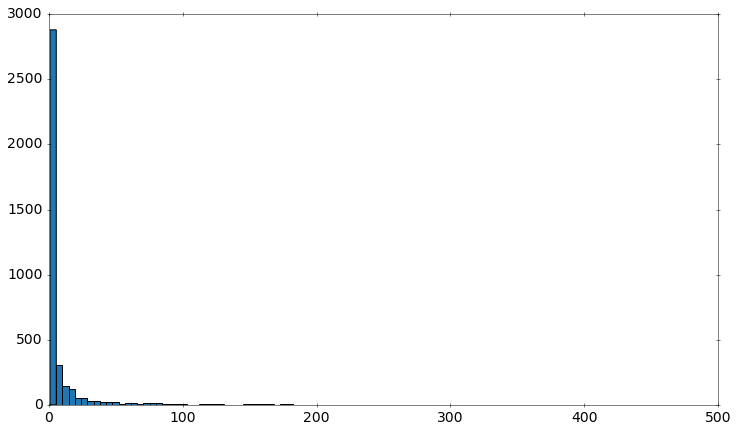

In [93]:
sql = """select edge, count(*) as weight from rest_cat_edges group by 1;"""
df = psql.read_sql(sql,conn)
df[df['weight']<500].weight.hist(bins=100)

### Exploring how food related businesses are categorized
__Visualizing top 50 food related categories in a network graph__

In [18]:
%%execsql
create temp table top50cats as
select * from rest_cat_edges order by weight desc limit 50;

In [20]:
%%showsql
select * from top50cats limit 5;

,edge,weight
0,"[Cafes, Restaurants]",619
1,"[Italian, Pizza]",587
2,"[Coffee & Tea, Food]",1560
3,"[Restaurants, Sandwiches]",1881
4,"[Restaurants, Sports Bars]",501


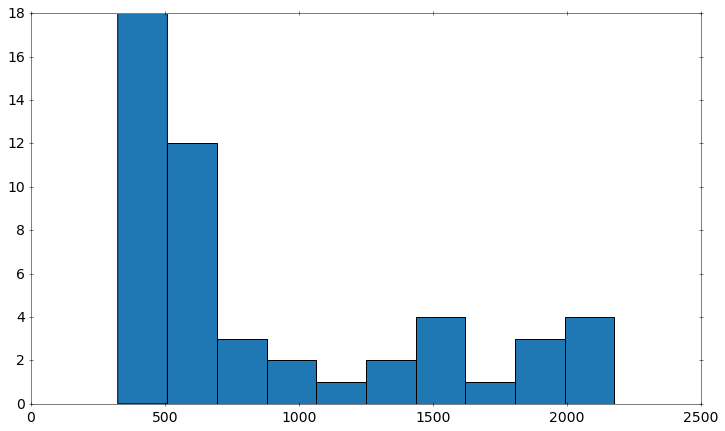

In [22]:
sql = """select * from top50cats;"""
df = psql.read_sql(sql,conn)
df.weight.hist(bins=10)

In [37]:
sql = """select unnest(edge) as category from top50cats group by 1; """
df = psql.read_sql(sql,conn)
nodes = df.category.tolist()

In [42]:
sql = """select edge, log(weight) as weight from top50cats; """
df = psql.read_sql(sql,conn)
edges = [tuple(v) for v in df.edge.tolist()]
weights = df.weight.tolist()
edges = [t+(float(w),) for t,w in zip(edges,weights)]

In [36]:
G=nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)
pos=nx.spring_layout(G)

for node,(x,y) in pos.items():
    G.node[node]['x']=float(x)
    G.node[node]['y']=float(y)  
nx.write_graphml(G, 'top50cat.graphml')


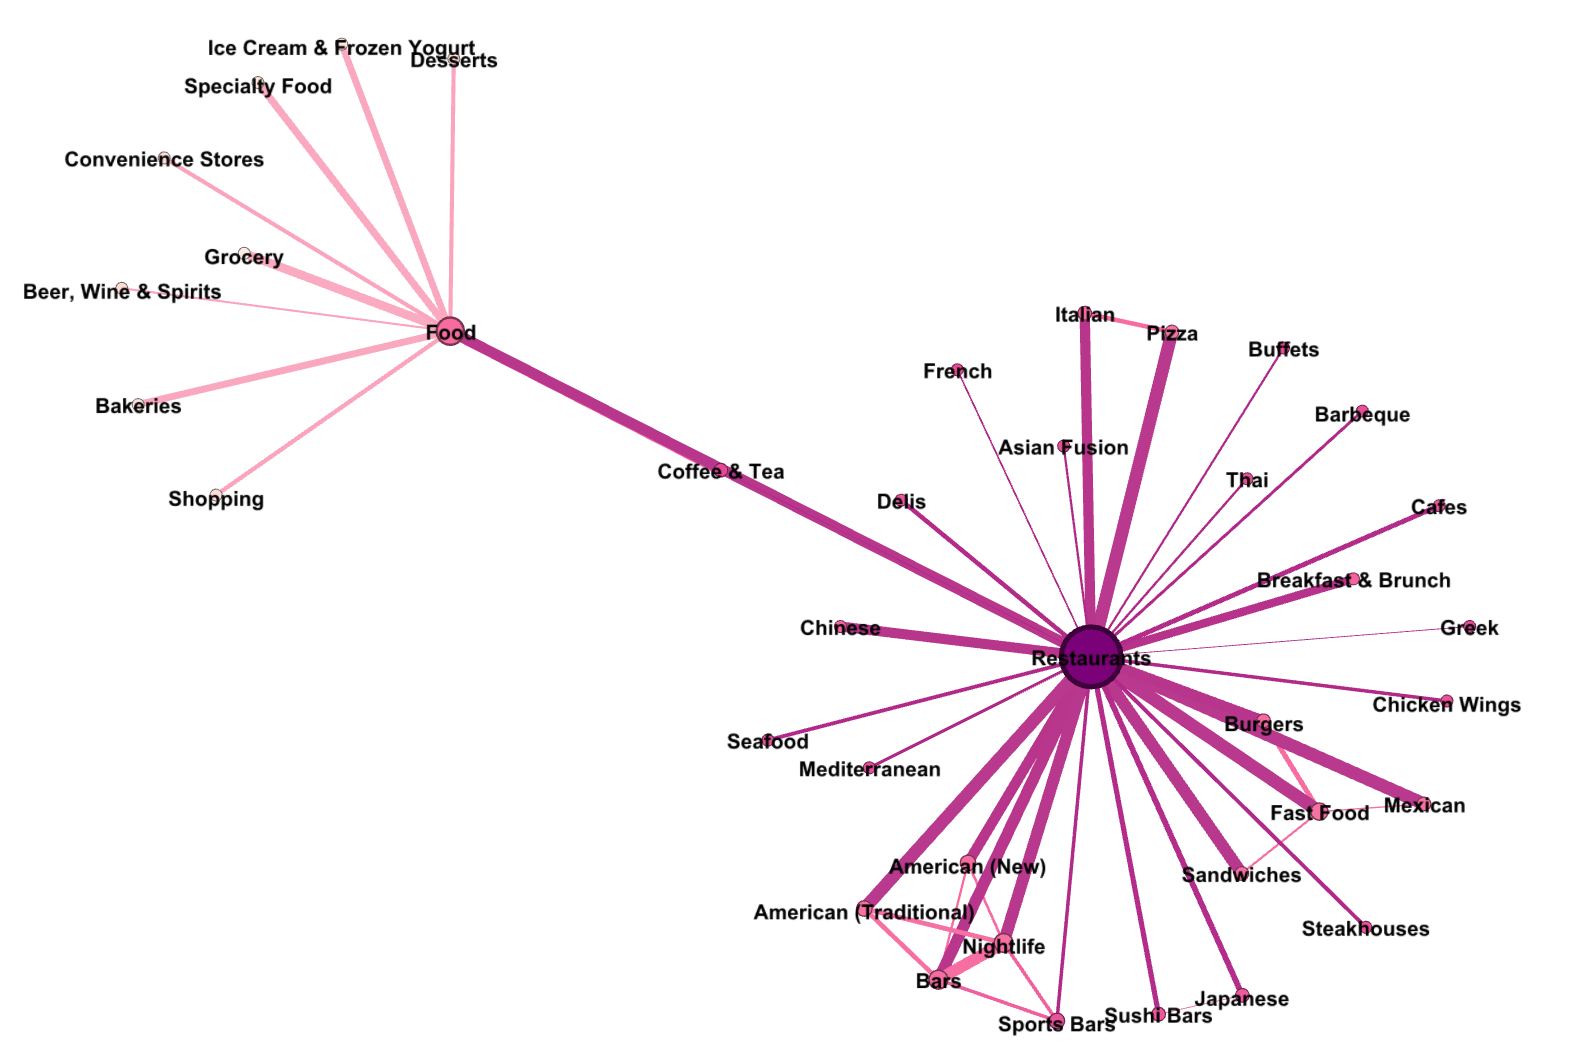

In [41]:
Image(filename='images/top50cat_network_graph.png')

__Visualizing top 100 food related categories in a network graph__

In [56]:
sql = """select unnest(edge) as category from top100cats group by 1; """
df = psql.read_sql(sql,conn)
nodes = df.category.tolist()

sql = """select edge, weight from top100cats; """
df = psql.read_sql(sql,conn)
edges = [tuple(v) for v in df.edge.tolist()]
weights = df.weight.tolist()
edges = [t+(float(w),) for t,w in zip(edges,weights)]

In [57]:
G=nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)
pos=nx.spring_layout(G)

for node,(x,y) in pos.items():
    G.node[node]['x']=float(x)
    G.node[node]['y']=float(y)  
nx.write_graphml(G, 'top100cats.graphml')

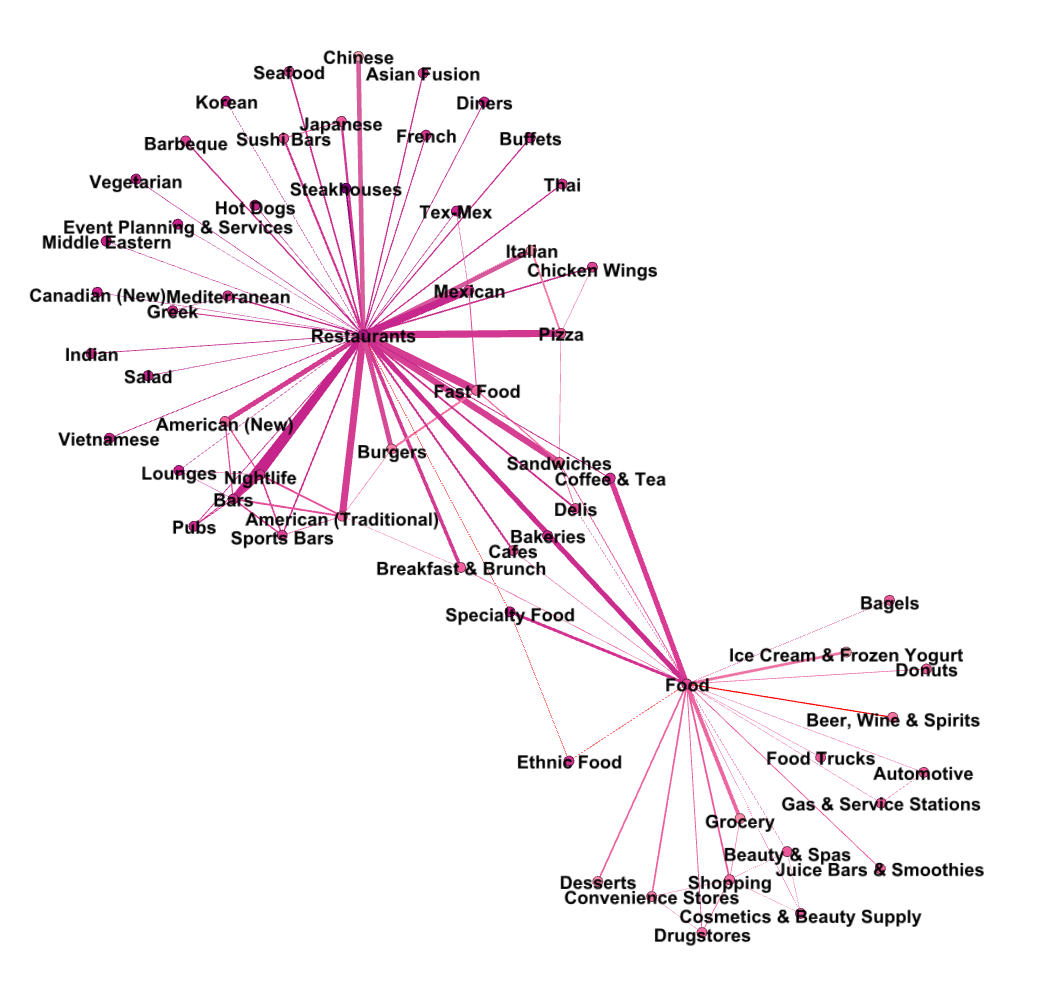

In [58]:
Image(filename='images/top100cat.png')

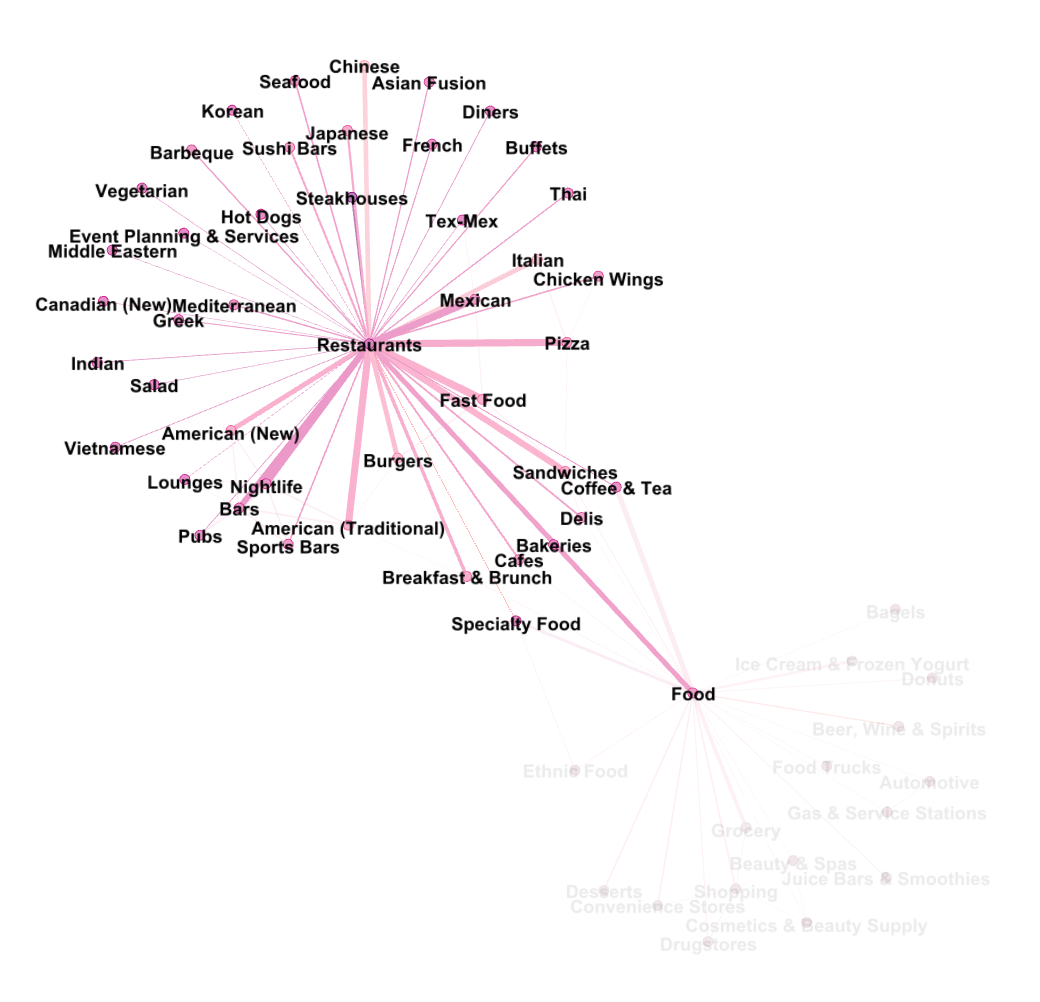

In [59]:
Image(filename='images/top100cat_restaurant.png')

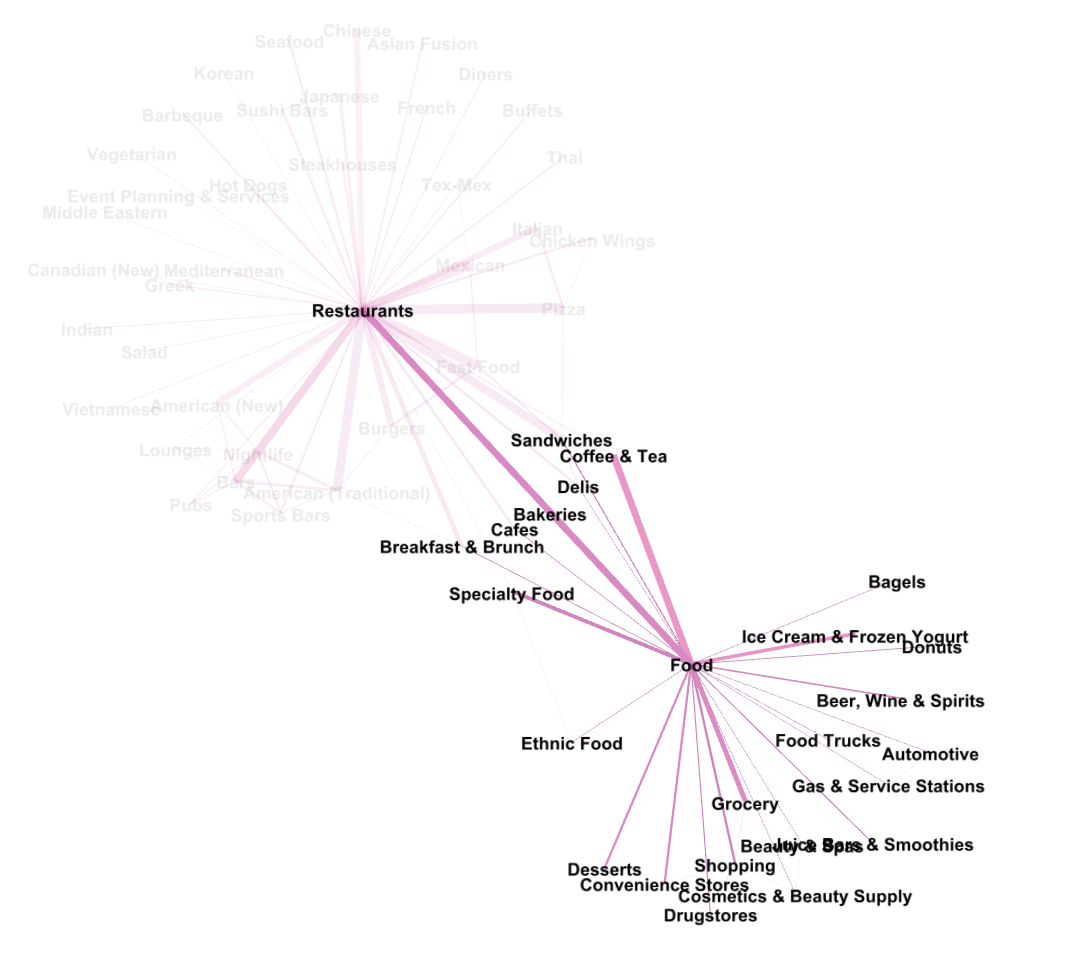

In [60]:
Image(filename='images/top100cat_food.png')

__How many total businesses are there in each city?__


The cities for which we are expecting data are:
+ U.K.: Edinburgh(EDH, MLN)
+ Germany: Karlsruhe(BW,RP)
+ Canada: Montreal(QC) and Waterloo(ON)
+ U.S.: Pittsburgh(PA) , Charlotte(SC) , Urbana-Champaign(IL), Phoenix(AZ), Las Vegas(NV), Madison(WI)

There are 378 unique cities. We might want to group by states and assign a general city using our knowledge of cities.

__How many cities do we have for each state?__

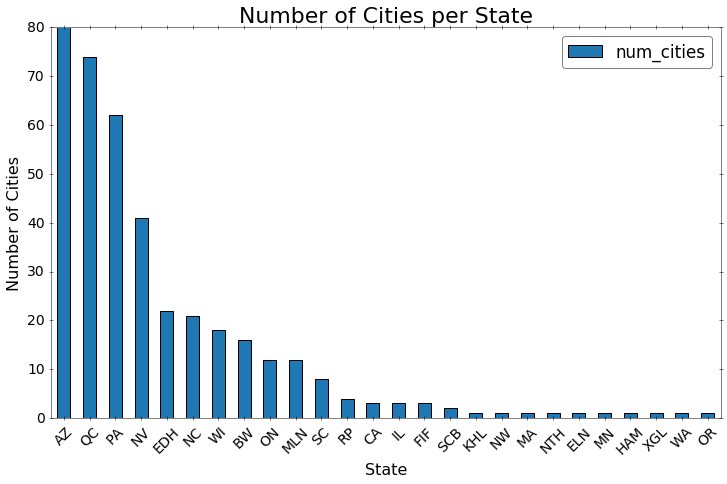

In [14]:
sql = """
    select
        state
        ,count(distinct city) as num_cities
    from 
        businesses
    group by 1
    order by 2 desc;
"""
df = psql.read_sql(sql,conn)
conn.commit()
ax = df.plot.bar(x='state', rot=45)
ax = set_labels(ax, 'Number of Cities per State', 'State', 'Number of Cities')

In [24]:
%%showsql
with statecity as (
    select
        state
        ,count(distinct city) as num_cities
    from 
        businesses
    group by 1
)
select 
    state
    ,business_id
    ,city
    ,full_address
    ,num_cities
from 
    businesses
join
    statecity
using (state)
where num_cities<7
order by num_cities;

,state,business_id,city,full_address,num_cities
0,ELN,LFf-IXdeb1nNil-BEQxQdA,Musselburgh,34 Bridge Street\nMusselburgh EH21 6AG,1
1,NTH,LjpkUvPGOPlBz0gJDMvkLQ,Edinburgh,28 King's Stable Rd\nGrassmarket\nEdinburgh EH1 2JY,1
2,ELN,FBzPxHL9tJYGw0uckrv3vg,Musselburgh,131 New Street\nMusselburgh EH21 6DH,1
3,ELN,aAh-R33lk169LlgCZ7E9Yg,Musselburgh,Stuart House Station Road\nMusselburgh EH21 7PQ,1
4,WA,oqfyVteTffdr1I4JHumDaw,Seattle,"2211 Elliott Ave\nSte 200, PMB 2030\nSoutheast\nSeattle, WA 98121",1
5,XGL,-TIlp6V8ExFIXnJ3M0BWwA,Edinburgh,9 South Charlotte Street\nNew Town\nEdinburgh EH2 4AS,1
6,ELN,V43ZSii2SQ8DPlag09Ty9A,Musselburgh,91 Newcraighall Road\nMusselburgh EH21 8RX,1
7,HAM,mfLOmbdLonUX2lcOtP2aqA,Stockbridge,5 Raeburn Place\nStockbridge\nStockbridge\nStockbridge EH4 1HU,1
8,ELN,5HVmBD0vznPVi2DlvF_ejQ,Musselburgh,Mall Avenue\nMusselburgh EH21 7BL,1
9,ELN,6URo94G7HNmMeUYchlFX7Q,Musselburgh,198 High Street\nMusselburgh EH21 7DX,1
